## Importing Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from numpy import isnan
import plotly.express as px
import plotly.offline as pyo
import plotly as py


# ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('importing completed')

importing completed


## Loading Dataset

In [ ]:
data=pd.read_csv('/content/Social Development Bank Loans For 2019.csv')
data.head()

,ID,bank branch,funding type,funding classification,customer sector,financing value,installment value,cashing date,sex,age,social status,special needs,number of family members,saving loan,income
0,1.0,Tabūk,social,family,government employee,60000.0,>= 1000,2019/02,MALE,>= 30,married,No,>= 05,No,< 5000
1,2.0,Hail,project,solution,NaN,160000.0,>= 1000,2019/01,MALE,< 30,single,No,< 02,No,< 5000
2,3.0,Tabūk,social,marriage,government employee,60000.0,>= 1000,2019/02,MALE,< 30,married,No,>= 02,No,>= 7500
3,4.0,Medina,social,marriage,employee of a government company,60000.0,< 1000,2019/03,MALE,< 30,married,No,>= 10,No,>= 5000
4,5.0,Medina,social,family,private sector employee,60000.0,>= 1000,2019/02,FEMALE,>= 30,divorced,No,>= 02,No,>= 10000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### knowing the data

In [ ]:
print('Shape of dataset is ', data.shape)

Shape of dataset is  (11175, 15)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11175 entries, 0 to 11174
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        11175 non-null  float64
 1   bank branch               11175 non-null  object 
 2   funding type              11175 non-null  object 
 3   funding classification    11175 non-null  object 
 4   customer sector           7225 non-null   object 
 5   financing value           11175 non-null  float64
 6   installment value         11175 non-null  object 
 7   cashing date              11175 non-null  object 
 8   sex                       11175 non-null  object 
 9   age                       11169 non-null  object 
 10  social status             11175 non-null  object 
 11  special needs             11175 non-null  object 
 12  number of family members  11132 non-null  object 
 13  saving loan               11175 non-null  object 
 14  income

In [ ]:
data.describe()

,ID,financing value
count,11175.000000,1.117500e+04
mean,5588.000000,6.396923e+04
std,3226.088963,4.743736e+04
min,1.000000,1.800000e+04
25%,2794.500000,6.000000e+04
50%,5588.000000,6.000000e+04
75%,8381.500000,6.000000e+04
max,11175.000000,2.116000e+06


In [ ]:
#Checking for the null values in the dataset
data.isnull().sum()

ID                             0
bank branch                    0
funding type                   0
funding classification         0
customer sector             3950
financing value                0
installment value              0
cashing date                   0
sex                            0
age                            6
social status                  0
special needs                  0
number of family members      43
saving loan                    0
income                       114
dtype: int64

**Explanation about missing values in our dataset.**

we have 4 column have missing values.

1- column customer sector has 3950 values is missing.

2- column age has 6 values is missing.

3- column number of family members has 43 values is missing.

4- column income has 114 values is missing.

In [ ]:
#
high_income = [">= 10000"]
low_income = [">= 5000"] 
average_income = [">= 7500"]
very_low_income = ["< 5000"]

data['income'] = data['income'].replace(high_income,'high income')
data['income'] = data['income'].replace(average_income,'average income')
data['income'] = data['income'].replace(low_income,'low income')
data['income'] = data['income'].replace(very_low_income,'very low income')
data.head()

,ID,bank branch,funding type,funding classification,customer sector,financing value,installment value,cashing date,sex,age,social status,special needs,number of family members,saving loan,income
0,1.0,Northern Region,social,family,government employee,60000.0,>= 1000,2019/02,MALE,>= 30,married,No,>= 05,No,very low income
1,2.0,Northern Region,project,solution,NaN,160000.0,>= 1000,2019/01,MALE,< 30,single,No,< 02,No,very low income
2,3.0,Northern Region,social,marriage,government employee,60000.0,>= 1000,2019/02,MALE,< 30,married,No,>= 02,No,average income
3,4.0,Western Region,social,marriage,employee of a government company,60000.0,< 1000,2019/03,MALE,< 30,married,No,>= 10,No,low income
4,5.0,Western Region,social,family,private sector employee,60000.0,>= 1000,2019/02,FEMALE,>= 30,divorced,No,>= 02,No,high income


In [ ]:
Young_adults = ["< 30"]
adults = [">= 30"] 
middel_aged_adults = [">= 40"]
old_adults = [">= 60"]

data['age'] = data['age'].replace(Young_adults,'young adults')
data['age'] = data['age'].replace(adults,'adults')
data['age'] = data['age'].replace(middel_aged_adults,'middel aged adults')
data['age'] = data['age'].replace(old_adults,'old adults')
data.head()

,ID,bank branch,funding type,funding classification,customer sector,financing value,installment value,cashing date,sex,age,social status,special needs,number of family members,saving loan,income
0,1.0,Northern Region,social,family,government employee,60000.0,>= 1000,2019/02,MALE,adults,married,No,>= 05,No,very low income
1,2.0,Northern Region,project,solution,NaN,160000.0,>= 1000,2019/01,MALE,young adults,single,No,< 02,No,very low income
2,3.0,Northern Region,social,marriage,government employee,60000.0,>= 1000,2019/02,MALE,young adults,married,No,>= 02,No,average income
3,4.0,Western Region,social,marriage,employee of a government company,60000.0,< 1000,2019/03,MALE,young adults,married,No,>= 10,No,low income
4,5.0,Western Region,social,family,private sector employee,60000.0,>= 1000,2019/02,FEMALE,adults,divorced,No,>= 02,No,high income


In [ ]:
Central_Region = ['Riyadh', "Kharj", "Al Majma'ah", "Wadi ad-Dawasir", "Duwadimi"]
Eastern_Region = ["Dammam", "Hafar Al Batin"]
Southern_Region = ["Abha", "Khamis Mushait", "Al Bahah", "Jazan", "Najrān", "Bisha"] 
Western_Region = ["Jeddah", "Yanbu", "Mecca", "Medina", "Taif", "Al Qunfudhah"]
Northern_Region = ["Tabūk", "Buraydah", "Hail", "Arar", "Al Jowf", "Ar Rass", "Al Namas", "Al Qurayyat"]

data['bank branch'] = data['bank branch'].replace(Central_Region,'Central Region')
data['bank branch'] = data['bank branch'].replace(Eastern_Region,'Eastern Region')
data['bank branch'] = data['bank branch'].replace(Southern_Region,'Southern Region')
data['bank branch'] = data['bank branch'].replace(Western_Region,'Western Region')
data['bank branch'] = data['bank branch'].replace(Northern_Region,'Northern Region')
data.head()

,ID,bank branch,funding type,funding classification,customer sector,financing value,installment value,cashing date,sex,age,social status,special needs,number of family members,saving loan,income
0,1.0,Northern Region,social,family,government employee,60000.0,>= 1000,2019/02,MALE,>= 30,married,No,>= 05,No,< 5000
1,2.0,Northern Region,project,solution,NaN,160000.0,>= 1000,2019/01,MALE,< 30,single,No,< 02,No,< 5000
2,3.0,Northern Region,social,marriage,government employee,60000.0,>= 1000,2019/02,MALE,< 30,married,No,>= 02,No,>= 7500
3,4.0,Western Region,social,marriage,employee of a government company,60000.0,< 1000,2019/03,MALE,< 30,married,No,>= 10,No,>= 5000
4,5.0,Western Region,social,family,private sector employee,60000.0,>= 1000,2019/02,FEMALE,>= 30,divorced,No,>= 02,No,>= 10000


# EDA

In [ ]:
fig = px.pie(data, names ='funding classification', color_discrete_sequence = px.colors.sequential.dense)
fig.update_layout(
    title={
        'text': "loans classification",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

The type of funding varies from funding a loan for marriage and family, or for small projects such as buying a taxicab, the highest percentage is the financing of a loan for marriage.

In [ ]:
fig = px.pie(data, names ='funding type', color_discrete_sequence = px.colors.sequential.dense)
fig.update_layout(
    title={
        'text': "Funding types",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Most clients take social loans.

In [ ]:
fig = px.bar(data, x ='cashing date', y = 'ID',labels={'cashing date':'Months','ID':'Total number of financing value'},color='funding classification', barmode='group')
fig.update_layout(
    title={
        'text': "Total number of financing value for each funding producet",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Total of financing value for each financing purpose in three months, for example, in February, 20 million was given for marriage loans.

In [ ]:
import plotly.express as px
df = data
fig = px.bar(df, x="sex", y="financing value",
             color='sex', barmode='overlay',
             height=400)
fig.update_layout(
    title={
        'text': "financing value per Gender",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

This chart shows the total financing value of the loans per gender. 

<Figure size 1152x720 with 0 Axes>

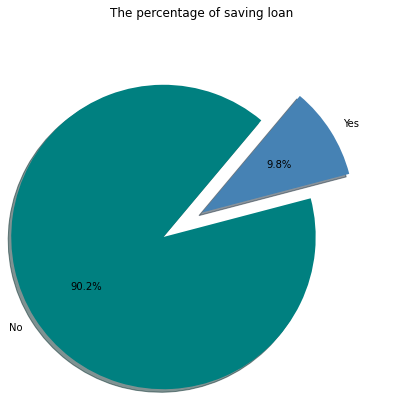

In [ ]:

labels =data['saving loan'].value_counts(sort = True).index
sizes = data['saving loan'].value_counts(sort = True)

colors = ["teal","steelblue"]
explode = (0.3,0) 
plt.figure(figsize=(16,10))
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=50,)

plt.title('The percentage of saving loan' )
plt.show()

The percentage of clients who have savings loans is 9.8%.

Text(0.5, 1.0, 'income Distribution')

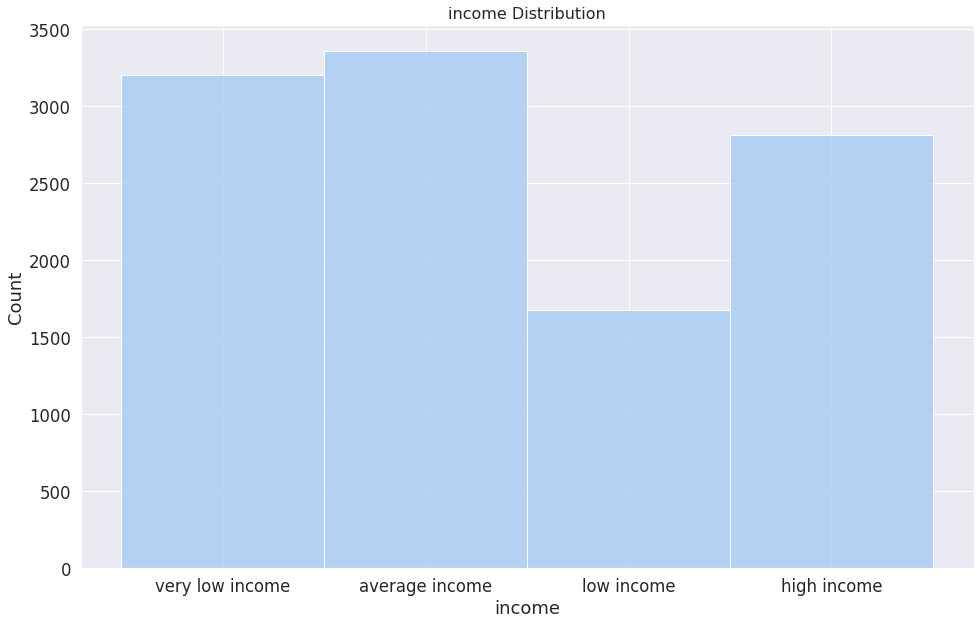

In [ ]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
sns.set_palette("pastel")
sns.histplot(data.income ).set_title("income Distribution",size = 16)


This graph shows that most clients who apply for a loan are average income and the least number of clients who apply for loans are low-income people.

Text(0.5, 1.0, 'Region and number of loans ')

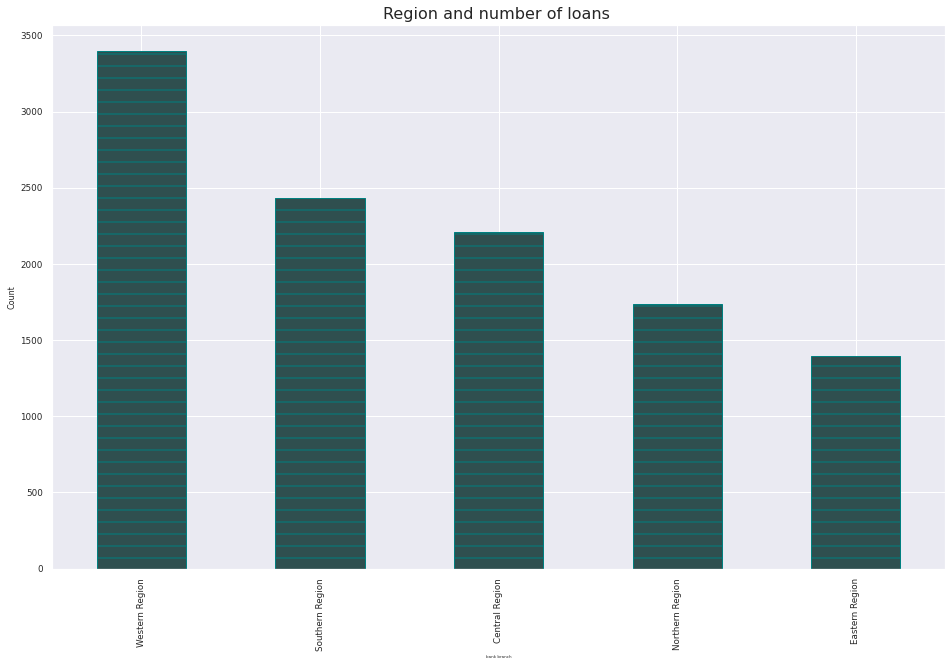

In [ ]:
plt.figure(figsize=(16,10))

ax1 = data["bank branch"].value_counts().sort_values(ascending=False).plot(kind = "bar", 
                                                                                 color = "darkslategray",
                                                                                hatch="-", edgecolor="teal")

ax1.set_xlabel("bank branch",  size = 4)
ax1.set_ylabel("Count", size = 8)
plt.title("Region and number of loans ", size = 16)

Most of the bank's branches are located in the western region of the Kingdom of Saudi Arabia.

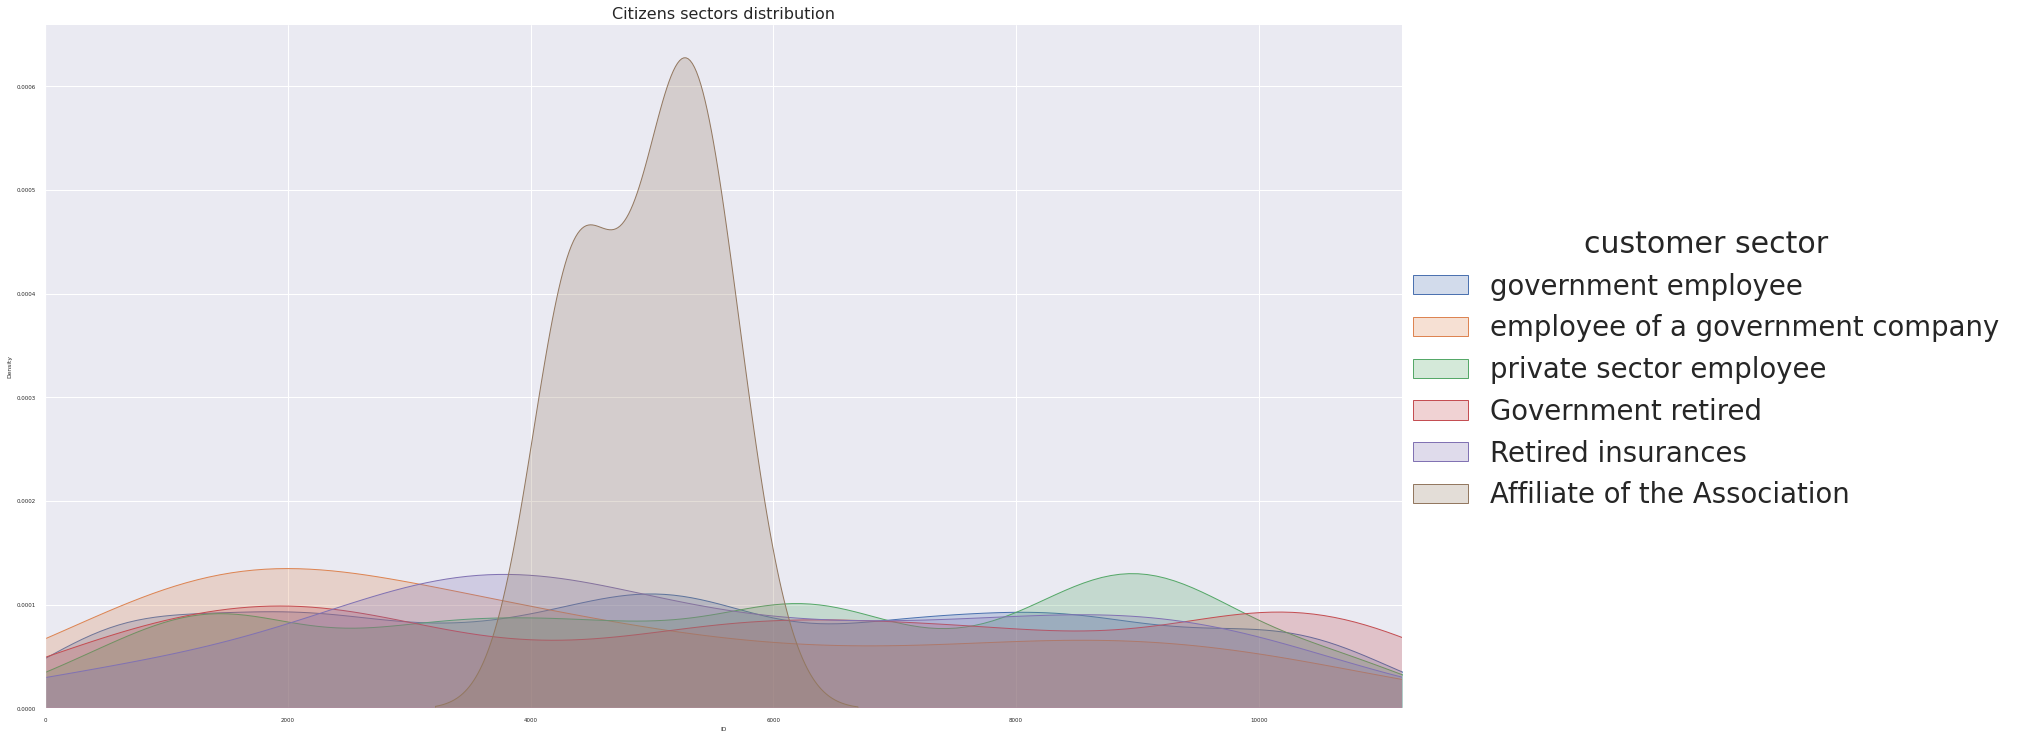

In [ ]:
fig = sns.FacetGrid(data, hue="customer sector", aspect=2, height=10)
sns.set_palette("crest_r")
fig.map(sns.kdeplot, 'ID', shade=True)
oldest = data['ID'].max()
fig.set(xlim=(0, oldest))
sns.set(font_scale=2.5)
plt.title("Citizens sectors distribution", size = 16)
fig.add_legend()

 clients sector varies from government work to private sector or affiliated of the association but the majority of the clients works in government companies.

Text(0.5, 1.0, 'Funding type and income')

<Figure size 1152x1152 with 0 Axes>

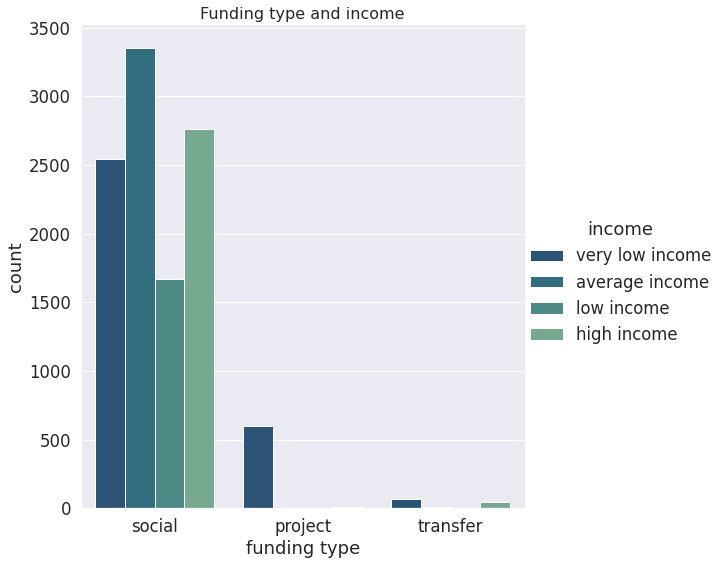

In [ ]:
plt.figure(figsize=(16,16))
sns.set(font_scale=1.5)
sns.catplot("funding type", data=data, kind="count", height=8,palette = 'crest_r',hue="income")
plt.title("Funding type and income", size = 16)

In this chart, we see that most of the loan requests are social loans, and they are mostly applied by average -income clients.

Text(0.5, 1.0, 'financing value and age group')

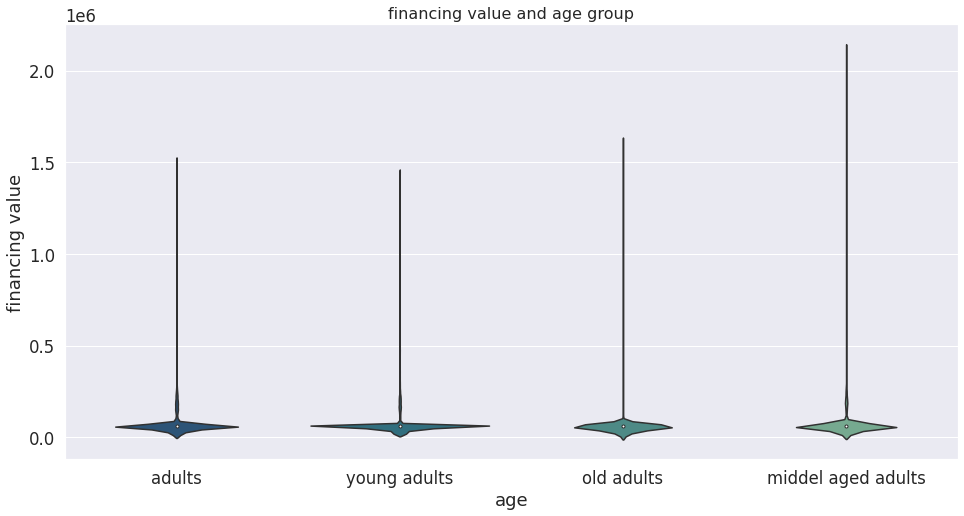

In [ ]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.5)
sns.violinplot(x = 'age', y="financing value", data = data ,palette = 'crest_r')
plt.title("financing value and age group", size = 16)

The results were similar for all ages.

Text(0.5, 1.0, 'financing value and funding type')

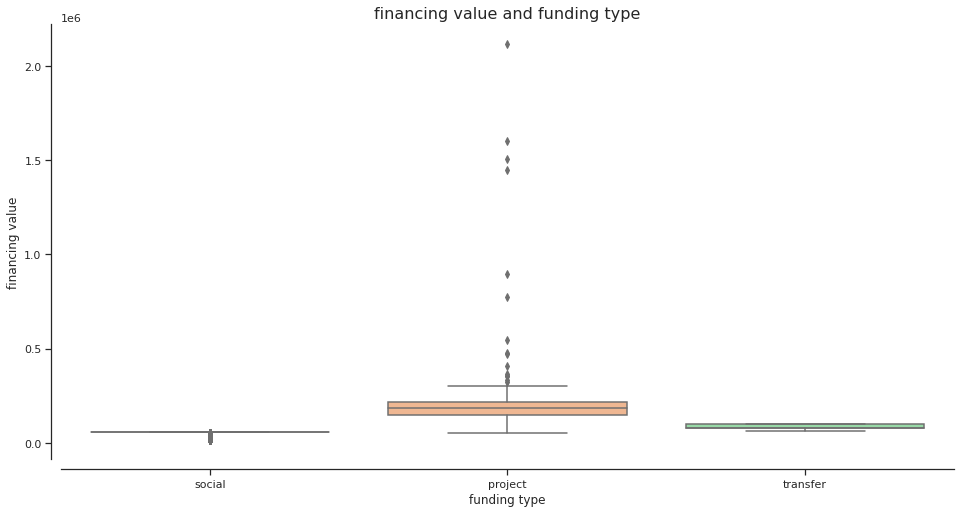

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x="funding type", y="financing value",data=data)
sns.despine(offset=10, trim=False)
plt.title("financing value and funding type", size = 16)

The amount of financing varies according to the type of financing.

Text(0.5, 1.0, 'funding type and gender')

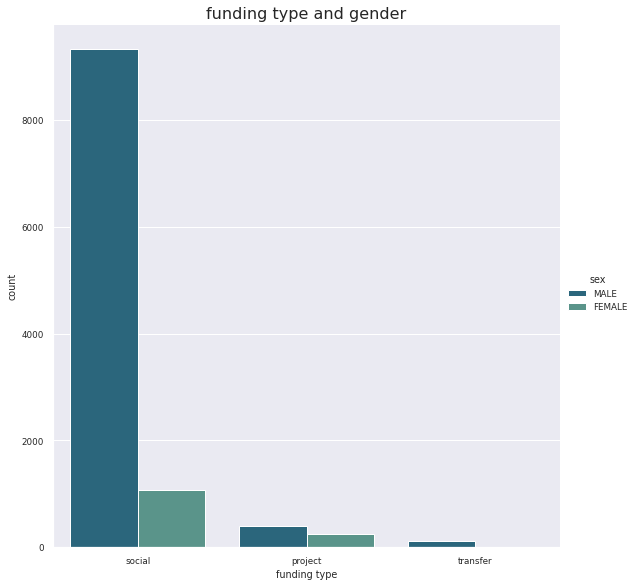

In [ ]:

sns.set(font_scale=0.8)
sns.catplot("funding type", data=data, kind="count", height=8,palette = 'crest_r',hue='sex')
plt.title("funding type and gender", size = 16)

We see here that most of the males get a loan for a social purpose.

Text(0.5, 1.0, 'saving loans and gender')

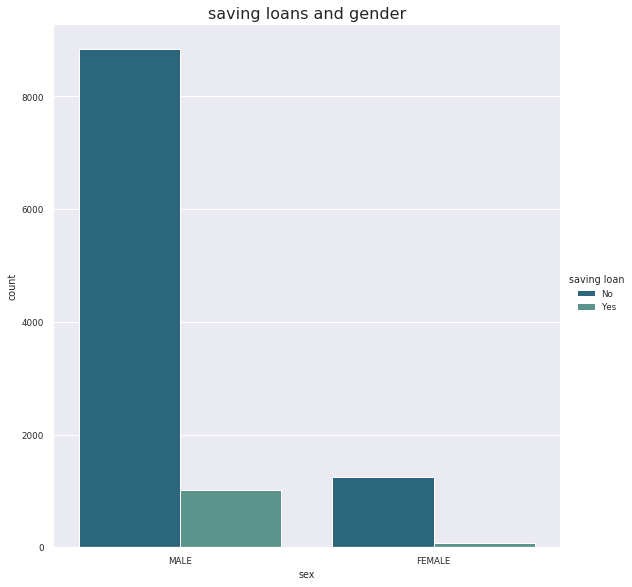

In [ ]:
sns.set(font_scale=0.8)
sns.catplot("sex", data=data, kind="count", height=8,palette = 'crest_r',hue='saving loan')
plt.title("saving loans and gender", size = 16)

We see that the number of males is much more than females, and most of them do not have saving loans.

Text(0.5, 1.0, 'instalment value and income')

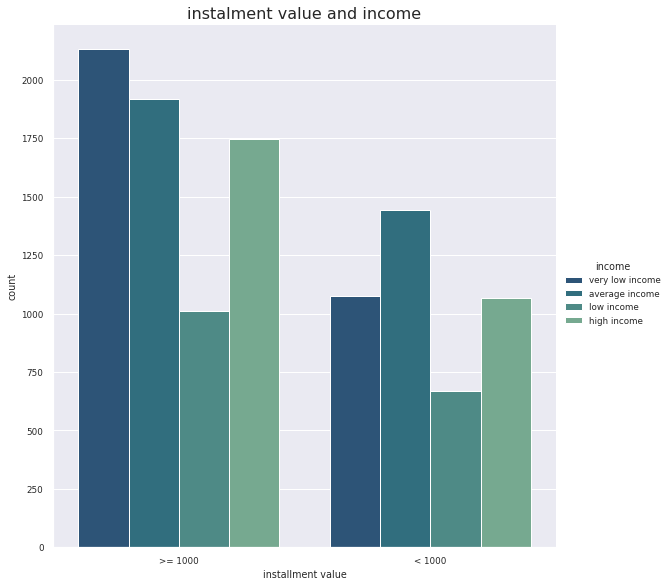

In [ ]:
sns.set(font_scale=0.8)
sns.catplot("installment value", data=data, kind="count", height=8,palette = 'crest_r',hue='income')
plt.title("instalment value and income", size = 16)

The value of the loan installment can be higher than or equal to 1000 Riyals per month or less than 1000 riyals per month, and we see here that very low-income people often take a loan with a monthly installment value higher than 1000 Riyals.